In [7]:
import pandas as pd
import csv
import os
from PIL import Image, ImageEnhance
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from torchvision.io import read_image
import numpy as np
from torchvision.datasets import ImageFolder
import random
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as T
from tqdm import tqdm
from glob import glob
from random import randint


In [9]:
transforms = transforms.Compose([
                    transforms.RandomRotation((0,15)),
                    transforms.CenterCrop((350,350)),
                    transforms.RandomAutocontrast(10),

                    transforms.Resize((128,128)),
                    transforms.RandomHorizontalFlip(0.5),
                    transforms.ToTensor(),
])


In [2]:
def train_val_dataset(dataset, val_split=0.2):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    # , stratify=dataset.targets
    datasets = {}
    print(val_idx[0])
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets


dataroot = '/opt/ml/input/purified/train/'
dataset = ImageFolder(dataroot, transforms)

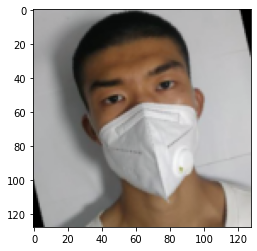

In [5]:
img_path = dataset[100][0]
# img = read_image(img_path)
imshow(np.asarray(img_path).transpose((1,2,0)))
# imshow(img_path)

dataloader = DataLoader(
    dataset=dataset,
    batch_size=1,
)

/opt/ml/input/purified/train/0/001061_male_25_mask2.jpg
3


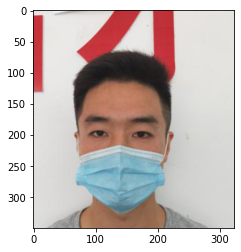

In [43]:
import torch

all_img = glob(f'{dataroot}0/*.*', recursive=True)
print(all_img[0])
# img = torch.tensor(read_image(all_img[0]))
img = read_image(all_img[0])
# img = transforms(img)
img = crop_RGB(img, 50,60,350,350)
print(len(img.shape))
imshow(np.asarray(img).transpose((1,2,0)))

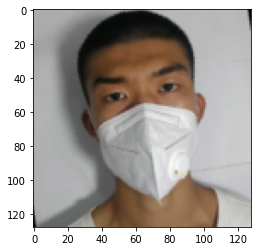

In [13]:


for idx, (data, label) in enumerate(dataloader):
    if idx == 100:
        imshow(np.asarray(data[0]).transpose((1,2,0)))
        break


In [4]:
from torchvision.io import read_image
import cv2

n_class = 18
dataroot = '/opt/ml/input/purified/train/'

In [55]:
def crop_tensor(img: torch.Tensor, x,y,w,h)->torch.Tensor:
    # (3, W, H)
    if len(img.shape) == 3:
        return img[:, x:x+w, y:y+h]
    elif len(img.shape) == 1:
        return img[x:x+w, y:y+h]
    else:
        raise Exception(f'Tensor size err: Cannot handle {img.shape} image')

# def crop_tensor2(src)

def contrast(src):
    enhancer = ImageEnhance.Contrast(src)
    return enhancer.enhance(1.5)


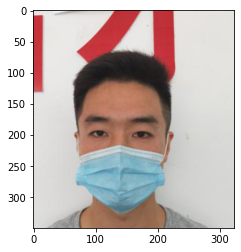

In [50]:
all_img = glob(f'{dataroot}0/*.*', recursive=True)
img = read_image(all_img[0])

img = crop_tensor(img, 50,60,350,350)
imshow(np.asarray(img).transpose((1,2,0)))

In [81]:

from random import randint

In [5]:


def TP(img):
    img = img.crop((50,60,350,350))

    img = ImageEnhance.Contrast(img).enhance(5)
    img = ImageEnhance.Sharpness(img).enhance(5)
    img = ImageEnhance.Brightness(img).enhance(0.9)
    img = ImageEnhance.Color(img).enhance(8)

    # img = ImageEnhance.Contrast(img).enhance(0.6)
    # img = ImageEnhance.Color(img).enhance(8)
    # img = ImageEnhance.Sharpness(img).enhance(5)
    #---
    # img = ImageEnhance.Brightness(img).enhance(0.9)
    return img

8636


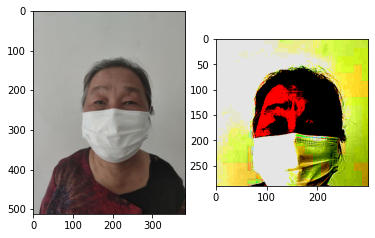

In [8]:
all_img = glob(f'{dataroot}*/*.*', recursive=True)
# img = read_image(all_img[0])

i = randint(0,18900)
print(i)
# i = 6891
src = Image.open(all_img[i])
# img = img.
# img = transforms(img)


# print(torch.Tensor(img))

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.imshow(src)
ax2.imshow(TP(src))
# img = TP(src)
# img.show()

In [474]:
from PIL import Image

class MaskDataset(Dataset):
    def __init__(self, dataroot: str, isTrain: bool, n_class=18):
        self.x = []
        self.y = []
        self.isTrain = isTrain

        for cls in tqdm(range(n_class)):
            if cls in [0,1,2,3,4,5]:    m_cls = 0
            elif cls in [6,7,8,9,10]:   m_cls = 1
            else:                       m_cls = 2

            cls_paths = glob(f'{dataroot}{cls}/*.*')
            self.x.extend( [Image.open(path) for path in tqdm(cls_paths, desc=f'Class{cls:<3}')] )
            self.y.extend( [m_cls] * len(cls_paths) )
        
        self.x = self._preprocess()

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        if self.isTrain:    return self.x[idx], self.y[idx]
        else:               return self.x[idx]


    def _preprocess(self):
        for idx, img in tqdm(enumerate(self.x), desc='Mask Preprocessing'):
            img = img.crop((50,60,350,350))
            img = ImageEnhance.Contrast(img).enhance(5)
            img = ImageEnhance.Color(img).enhance(0.8)
            self.x[idx] = img

In [476]:
mask = MaskDataset(dataroot, True)
del mask

100%|██████████| 18/18 [00:01<00:00,  9.08it/s]
Mask Preprocessing: 18900it [01:35, 197.53it/s]


In [35]:
for cls in range(n_class):
    img_paths = glob(f'{dataroot}{cls}/*.*')
    imgs = [read_image(path) for path in tqdm(img_paths, desc=f'Class{cls:<3}')]
    

    # print(glob(f'{dataroot}{cls}/*.*')[0])


Class17 : 100%|██████████| 109/109 [00:00<00:00, 401.19it/s]


In [8]:
for cls in range(3):
    print(cls)

0
1
2
